# Hoeffding Inequality

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from statistics import mean

In [7]:
# flip 1000 coins 10 times
from math import floor

def coin_experiment(n):
    #n = number of times the experiment is run (n=100,000 in the HW)
    
    v_1_list = [] #v_1
    v_2_list = [] #v_rand
    v_3_list = [] #v_min

    for _ in range(n):
        #each trial
        
        coin_flips = []
        
        #for finding v_min
        min_freq = 10
        min_freq_idx = None
        
        for coin in range(1000):
            #each coin 
            
            flips = []    
            for flip_idx in range(10):
                #flip = floor(2*random.random()) #0 = Tails, 1 = Heads
                flip = floor(2*np.random.uniform(0,1)) #0 = Tails, 1 = Heads
                flips.append(flip)
            
            if sum(flips)<min_freq:
                min_freq = sum(flips)
                min_freq_idx = coin
            
            coin_flips.append(flips)
            
        v_1_list.append(mean(coin_flips[0]))
        rand_idx = floor(1000*random.random())
        v_2_list.append(mean(coin_flips[rand_idx]))
        
#         print(f'min head count @ index = {min_freq_idx}')
#         print(f'min head amount = {sum(coin_flips[min_freq_idx])}')
#         print(f'other head amounts:')
#         print(f'{[sum(flips) for flips in coin_flips]}')
        
        
        v_3_list.append(mean(coin_flips[min_freq_idx]))
    
        if _%10000==0:
            print(f'trial number: {_}')

        
    return [v_1_list,v_2_list,v_3_list]

In [ ]:
%prun results = coin_experiment(100000)

trial number: 0


In [27]:
mean(results[2])

#this is the average of v_min over all 100,000 trials

0.037613

## Question 1:

Correct Answer: **B** (average of $\nu_{min}$ is closest to 0.01)

## Question 2:

(Single Bin) Hoeffding's Inequality: $$\mathbb{P}[|E_{in}(h)-E_{out}(h)|>\epsilon] \leq 2e^{-2\epsilon^2N}$$

Correct Answer: **D** ($c_1$ and $c_{rand}$)

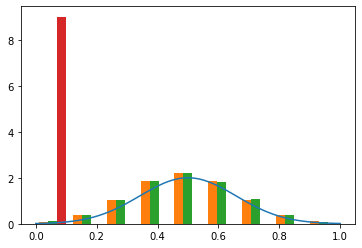

In [28]:
bins=np.linspace(0,1,10)
x_s=np.linspace(0,1,100)

y = 2*np.exp(-20*np.power(x_s-0.5,2))

plt.plot(x_s,y)

plt.hist(x=results,bins=bins,density=True);

# Error and Noise

Consider the bin model for a hypothesis $h$ that makes an error with probability $µ$ in approximating a deterministic target function $f$ (both $h$ and $f$ are binary functions). If we use the same $h$ to approximate a noisy version of $f$ given by:


\begin{equation}
\mathbb{P}(y \ | \ \mathbf{x}) = 
    \begin{cases}
        \lambda & \text{if } y = f(\mathbf{x})\\
        1 - \lambda & \text{if } y \neq f(\mathbf{x})
    \end{cases}
\end{equation}


## Question 3:

What is the probability of error that $h$ makes in approximating $y$?

We consider two separate ways $h$ can make an error:

- If $h$ makes an error approximating $f$ **and** $y = f(\mathbf{x})$
- If $h$ doesn't make an error approximating $f$ but $y \neq f(\mathbf{x})$

Since these are independent events we can multiply their separate probabilities to get:

$$
\text{Probability} = \mu \cdot \lambda + (1-\mu) \cdot (1-\lambda)
$$

Correct Answer: **E**

## Question 4:

At what value of $λ$ will the performance of $h$ be independent of $µ$?

This is a simple calculation:

Collect together all terms involving $\mu$:

$$
\mu \cdot \lambda + (1-\mu) \cdot (1-\lambda) = \mu\lambda + 1 - \mu - \lambda + \mu\lambda = \mu(2\lambda-1) + 1 - \lambda
$$

So we only need to satisfy: $2\lambda - 1 = 0 \implies \lambda = \frac{1}{2}$

Correct Answer: **B**

# Linear Regression

In [8]:
def eval_f(a,b):
    num = slope*a + intercept 
    if (num<b):
        return mult 
    else:
        return -1*mult

In [9]:
# pts is a list of two points used to determine the linear function
# flip is a boolean that changes which side of the line evaluates to +1
# x is a vector we want to evaluate the function on
# a,b,x are numpy arrays

def evaluate_f(pts,flip,x):
    a = pts[0]
    b = pts[1]
    
    slope = (b[1]-a[1])/(b[0]-a[0])
    intercept = a[1] - slope*a[0]
    
    f_x = np.sign(x[1] - slope*x[0] - intercept)
    
    if flip == False:
        return f_x
    else:
        return -1*f_x

In [13]:
from numpy.linalg import inv

in_errors = []
out_errors = []

for experiment in range(1000):

    #generate target function
    pts = []
    for i in range(4):
        pts.append(random.uniform(-1,1))
    slope = (pts[3]-pts[1])/(pts[2]-pts[0])
    intercept = pts[1] - slope*pts[0]
    mult = random.choice([-1,1])

    #generate training set
    train_set_x = []
    train_set_y = []
    for _ in range(100):
        x = random.uniform(-1,1)
        y = random.uniform(-1,1)
        label = eval_f(x,y)
        train_set_x.append(np.array([1.0,x,y]))
        train_set_y.append(label)
        
    X = np.matrix(train_set_x)
    y = np.array(train_set_y)
    
    #generate testing set for out of sample performance:
    
    test_set_x = []
    test_set_y = []
    
    for _ in range(1000):
        test_x = random.uniform(-1,1)
        test_y = random.uniform(-1,1)
        label = eval_f(test_x,test_y)
        test_set_x.append(np.array([1.0,test_x,test_y]))
        test_set_y.append(label)    
    
    #linear regression
    
    #calculate pseudo-inverse of X
    A = inv(np.matmul(X.transpose(),X))
    X_dag = np.matmul(A,X.transpose())
    
    #get weights w
    w = np.matmul(X_dag,y)
    
    #g = sign(w*x)
    
    #calculate in-sample error 
    count = 0
    for idx in range(100):
        if np.sign(np.dot(w,train_set_x[idx])) != train_set_y[idx]:
            count += 1
    
    in_errors.append(count/100)
    #print(f'In-sample error rate = {count/100}')
    
    #calculate out-of-sample error (generate 1000 new points)
    
    count = 0
    for idx in range(1000):
        if np.sign(np.dot(w,test_set_x[idx])) != test_set_y[idx]:
            count += 1
    
    out_errors.append(count/1000)        
    #print(f'Out-of-sample error rate = {count/1000}')

## Question 5:

Take $N = 100$. Use Linear Regression to find g and evaluate $E_{in}$, the fraction of in-sample points which got classified incorrectly. Repeat the experiment 1000 times and take the average. Which of the following values is closest to the average $E_{in}$?

In [14]:
print(f'average In-sample error = {mean(in_errors)}')

average In-sample error = 0.03839


Correct Answer: **C** (in-sample error is closest to 0.01)

## Question 6:

Now, generate 1000 fresh points and use them to estimate the out-of-sample error $E_{out}$ of g that you got in Problem 5 (number of misclassified out-of-sample points / total number of out-of-sample points). Again, run the experiment 1000 times and take the average. Which value is closest to the average $E_{out}$?

In [15]:
print(f'average Out-of-sample error = {mean(out_errors)}')

average Out-of-sample error = 0.046602


Correct Answer: **C** (in-sample error is closest to 0.01)

## Question 7:

Now, take $N = 10$. After finding the weights using Linear Regression, use them as a vector of initial weights for the Perceptron Learning Algorithm. Run PLA until it converges to a final vector of weights that completely separates all the in-sample points. Among the choices below, what is the closest value to the average number of iterations (over 1000 runs) that PLA takes to converge? (When implementing PLA, have the algorithm choose a point randomly from the set of misclassified points at each iteration)

In [16]:
iter_list = [] # this will keep track of the number of iterations per run

for trial in range(1000):
    
    #generate data set
    
    #generate target function
    pts = []
    for i in range(4):
        pts.append(random.uniform(-1,1))
    slope = (pts[3]-pts[1])/(pts[2]-pts[0])
    intercept = pts[1] - slope*pts[0]
    mult = random.choice([-1,1])

    #generate training set
    train_set_x = []
    train_set_y = []
    for _ in range(10):
        x = random.uniform(-1,1)
        y = random.uniform(-1,1)
        label = eval_f(x,y)
        train_set_x.append(np.array([1.0,x,y]))
        train_set_y.append(label)
        
    X = np.matrix(train_set_x)
    y = np.array(train_set_y)
    
    #run linear regression alg

    #calculate pseudo-inverse of X
    A = inv(np.matmul(X.transpose(),X))
    X_dag = np.matmul(A,X.transpose())
    
    #get weights w
    w = np.matmul(X_dag,y)
    
    #run PLA
    
    finished = False 
    iterations = 0
    while (finished != True):
        idx_list = []
        for idx in range(10):
            if np.sign(np.dot(w,train_set_x[idx])) != train_set_y[idx]:
                idx_list.append(idx)
        if len(idx_list) != 0:
            idx_to_choose = random.choice(idx_list)
            w = w + train_set_y[idx_to_choose]*train_set_x[idx_to_choose]
            iterations += 1
        else:
            finished = True
    iter_list.append(iterations)
    
print(f'average number of iterations needed: {mean(iter_list)}')

average number of iterations needed: 4.199


Correct Answer: **A** (closest to 1)

# Nonlinear Transformation

In these problems, we again apply Linear Regression for classification. Consider the target function:

\begin{equation}
f(x_1,x_2) = \text{sign}(x_1^2 + x_2^2 - 0.6)
\end{equation}

Generate a training set of $N = 1000$ points on $\mathcal{X} = [−1, 1] \times [−1, 1]$ with a uniform probability of picking each $x \in X$. Generate simulated noise by flipping the sign of the output in a randomly selected 10% subset of the generated training set.

## Question 8:

Carry out Linear Regression without transformation, i.e., with feature vector $(1,x_1,x_2)$ to find the weight $w$. What is the closest value to the classification in-sample error $E_{in}$?

In [32]:
# generates a feature set in the form of a list of numpy arrays.
# n = number of points generated (integer)
# points will be in 2D and each co-ordinate is between -1 and 1

def feature_set_generator(n):
    train_set = []
    for _ in range(n):
        x_1 = random.uniform(-1,1)
        x_2 = random.uniform(-1,1)
        train_set.append(np.array([1.0,x_1,x_2]))
        
    return train_set

In [35]:
def target_function(x,y):
    output = np.sign(x*x + y*y - 0.6)
    return output 

In [47]:
train_set = feature_set_generator(1000)

train_set_labels = []

for elt in train_set:
    train_set_labels.append(target_function(elt[1],elt[2]))

#generate noise by flipping signs on 10% of data
labels_to_change = random.sample(list(range(len(train_set_labels))),100)
for idx in labels_to_change:
    train_set_labels[idx] *= -1


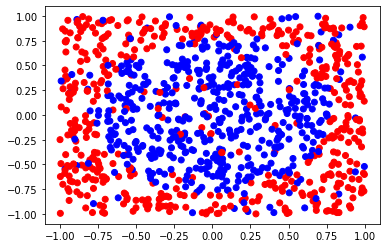

In [83]:
# plotting points to visualize the noise spread

import matplotlib.pyplot as plt

x_s = []
y_s = []
for data in train_set:
    x_s.append(data[1])
    y_s.append(data[2])

plt.scatter(x_s,y_s,c = train_set_labels, cmap='bwr')

plt.show()

In [53]:
# Linear regression algorithm

X = np.matrix(train_set)
y = np.array(train_set_labels)

#calculate pseudo-inverse of X

A = inv(np.matmul(X.transpose(),X))
X_dag = np.matmul(A,X.transpose())

#get weights w
w = np.matmul(X_dag,y)

#calculate in-sample error

count = 0
for idx in range(len(train_set)):
    if np.sign(np.dot(w,train_set[idx])) != train_set_labels[idx]:
        count += 1
        
print(f'In sample error = {count/len(train_set)}')

In sample error = 0.566


Correct Answer: **D** (closest to 0.5)

## Question 9:

Now, transform the $N = 1000$ training data into the following nonlinear feature vector: $(1,x_1,x_2,x_1x_2,x_1^2,x_2^2)$

Find the vector $\tilde{w}$ that corresponds to the solution of Linear Regression. Which of the following hypotheses is closest to the one you find?

In [79]:
list_of_weights = []

for experiment in range(1000):
    
    #generate training data:
    train_set = feature_set_generator(1000)
    
    train_set_labels = []

    for elt in train_set:
        train_set_labels.append(target_function(elt[1],elt[2]))

    #generate noise by flipping signs on 10% of data
    labels_to_change = random.sample(list(range(len(train_set_labels))),100)
    for idx in labels_to_change:
        train_set_labels[idx] *= -1

    # transforming training data:

    new_feature_set = []

    for elt in train_set:
        x_1 = elt[1]
        x_2 = elt[2]
        new_feature_set.append(np.array([1.0,x_1,x_2,x_1*x_2,x_1*x_1,x_2*x_2]))

    # Linear regression algorithm

    X_new = np.matrix(new_feature_set)
    y = np.array(train_set_labels)

    #calculate pseudo-inverse of X_new

    A = inv(np.matmul(X_new.transpose(),X_new))
    X_dag = np.matmul(A,X_new.transpose())

    #get weights w
    w = np.matmul(X_dag,y)
    
    list_of_weights.append(w)
    
print(np.average(list_of_weights,axis=0))


[[-9.94171836e-01  8.83833367e-04 -3.96756639e-04 -1.62193022e-06
   1.55931324e+00  1.56135029e+00]]


Correct Answer: **A** 

closest to: $$g(x_1,x_2) = \text{sign}(-1 - 0.05x_1 + 0.08x_2 + 0.12x_1x_2 + 1.5x_1^2 + 1.5x_2^2)$$

## Question 10:

What is the closest value to the classification out-of-sample error $E_{out}$ of your hypothesis from Problem 9?

In [81]:
counts = [] #will keep track of out of sample error rate across the 

for weights in list_of_weights: #1000 runs of the experiment above
    
    #generate testing set 
    testing_set = feature_set_generator(1000)

    testing_set_labels = []

    for elt in testing_set:
        testing_set_labels.append(target_function(elt[1],elt[2]))

    #generate noise by flipping signs on 10% of data
    labels_to_change = random.sample(list(range(len(testing_set_labels))),100)
    for idx in labels_to_change:
        testing_set_labels[idx] *= -1
    
    count = 0 #will keep track of how often predictions are incorrect
    
    for idx in range(len(testing_set)):
        x_1 = testing_set[idx][1]
        x_2 = testing_set[idx][2]
        
        mapped_data = np.array([1.0,x_1,x_2,x_1*x_2,x_1*x_1,x_2*x_2])

        predicted_label = np.sign(np.dot(weights,mapped_data))

        if predicted_label != testing_set_labels[idx]:
            count += 1
            
    counts.append(count/len(testing_set))
    
print(f'Average accuracy over 1000 runs is: {mean(counts)}')

Average accuracy over 1000 runs is: 0.126413


Correct Answer: **B** (closest to 0.1)